In [ ]:
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt  # 파이플롯 사용
from IPython.display import set_matplotlib_formats
import seaborn as sns
sns.set_style('whitegrid')

df = pd.read_csv("https://raw.githubusercontent.com/TaewoongKong/code_sharing/master/2016%E1%84%82%E1%85%A7%E1%86%AB_%E1%84%80%E1%85%A5%E1%86%AB%E1%84%80%E1%85%A1%E1%86%BC%E1%84%80%E1%85%A5%E1%86%B7%E1%84%8C%E1%85%B5%E1%86%AB_%E1%84%83%E1%85%A6%E1%84%8B%E1%85%B5%E1%84%90%E1%85%A5.csv")
df.head()

,기준년도,가입자일련번호,성별코드,연령대코드(5세단위),시도코드,신장(5Cm단위),체중(5Kg단위),허리둘레,시력(좌),시력(우),...,감마지티피,흡연상태,음주여부,구강검진 수검여부,치아우식증유무,결손치유무,치아마모증유무,제3대구치(사랑니)이상,치석,데이터공개일자
0,2016,465969,1,8,41,170.0,70.0,74.0,0.7,0.7,...,96.0,3.0,NaN,1,NaN,NaN,NaN,NaN,2.0,20171219
1,2016,565871,1,10,41,160.0,60.0,81.0,1.2,1.0,...,14.0,1.0,NaN,0,NaN,NaN,NaN,NaN,NaN,20171219
2,2016,115718,2,11,11,160.0,55.0,71.0,1.0,1.0,...,20.0,1.0,NaN,1,NaN,NaN,NaN,NaN,0.0,20171219
3,2016,767524,1,6,28,180.0,70.0,79.0,1.0,0.9,...,16.0,1.0,NaN,0,NaN,NaN,NaN,NaN,NaN,20171219
4,2016,482178,2,9,11,160.0,60.0,85.0,0.8,1.2,...,13.0,1.0,NaN,1,NaN,NaN,NaN,NaN,0.0,20171219


<ipython-input-8-71d8282df257>:16: UserWarning: 

`shade_lowest` has been replaced by `thresh`; setting `thresh=0.05.
This will become an error in seaborn v0.13.0; please update your code.

  ax = sns.kdeplot(x=df_man.waist, y=df_man.height, cmap="Reds", shade=False, shade_lowest=False, cbar=False)
<ipython-input-8-71d8282df257>:16: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=False`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(x=df_man.waist, y=df_man.height, cmap="Reds", shade=False, shade_lowest=False, cbar=False)
<ipython-input-8-71d8282df257>:17: UserWarning: 

`shade_lowest` has been replaced by `thresh`; setting `thresh=0.05.
This will become an error in seaborn v0.13.0; please update your code.

  ax = sns.kdeplot(x=df_woman.waist, y=df_woman.height, cmap="Blues", shade=False, shade_lowest=False)
<ipython-input-8-71d8282df257>:17: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting

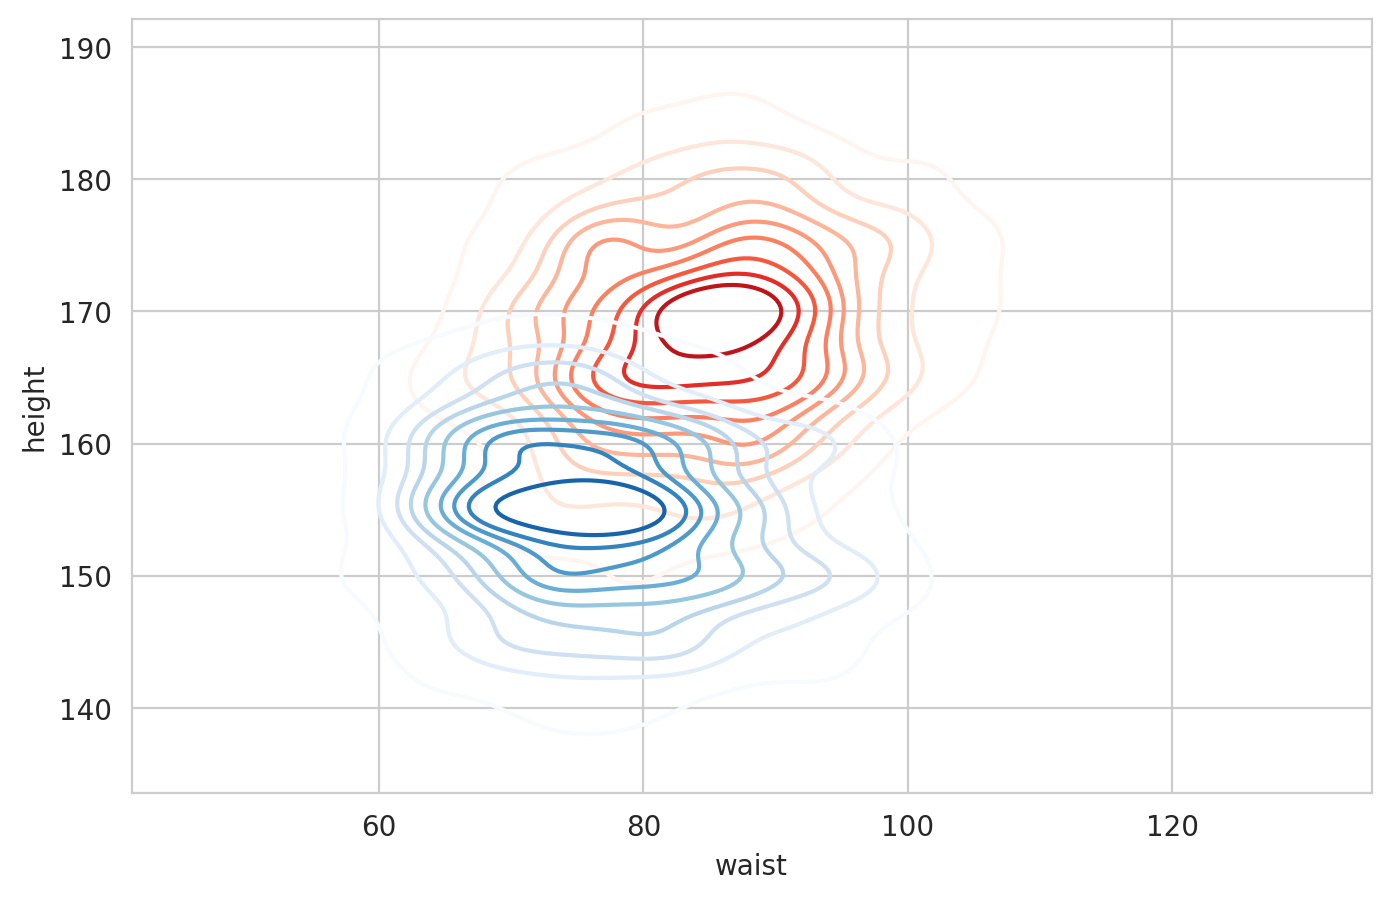

In [ ]:
df = df[['허리둘레', '신장(5Cm단위)','성별코드']]
df.columns = ['waist', 'height', 'sex']
#### 코드 추가 할 위치 1

df_man = df.loc[df['sex'] == 1]
df_woman = df.loc[df['sex'] == 2]
# 코드 추가 할 위치 1

# 분포가 어떤지 시각화 해봅니다.
# x 축에는 허리둘레, y 축에는 키를 넣었습니다
f, ax = plt.subplots(figsize=(8, 8))
ax.set_aspect("equal")

# 남성 데이터를 빨간색(Reds)으로 시각화
ax = sns.kdeplot(x=df_man.waist, y=df_man.height, cmap="Reds", shade=False, shade_lowest=False, cbar=False)
# 여성 데이터를 파란색(Blues)으로 시각화
ax = sns.kdeplot(x=df_woman.waist, y=df_woman.height, cmap="Blues", shade=False, shade_lowest=False)

red = sns.color_palette("Reds")[-2]  # 빨간색 팔레트의 색상
blue = sns.color_palette("Blues")[-2]  # 파란색 팔레트의 색상


In [ ]:
from sklearn.preprocessing import StandardScaler

# 데이터를 표준화합니다.
df_scaled = StandardScaler().fit_transform(df[['waist', 'height']])

from sklearn.decomposition import PCA

# PCA(Principal Component Analysis) 객체 생성
pca = PCA(n_components=1)

# 주성분 분석을 수행
pca.fit(df_scaled)

# 주성분 분석 결과를 df_pca에 저장
df_pca = pca.transform(df_scaled)

print(df_pca.shape)


(1000, 1)


<ipython-input-23-011deadbd7be>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_pca_component.loc[df_pca_component['target'] == 1, 'pca_component'],
<ipython-input-23-011deadbd7be>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_pca_component.loc[df_pca_component['target'] == 2, 'pca_com

<Axes: xlabel='pca_component'>

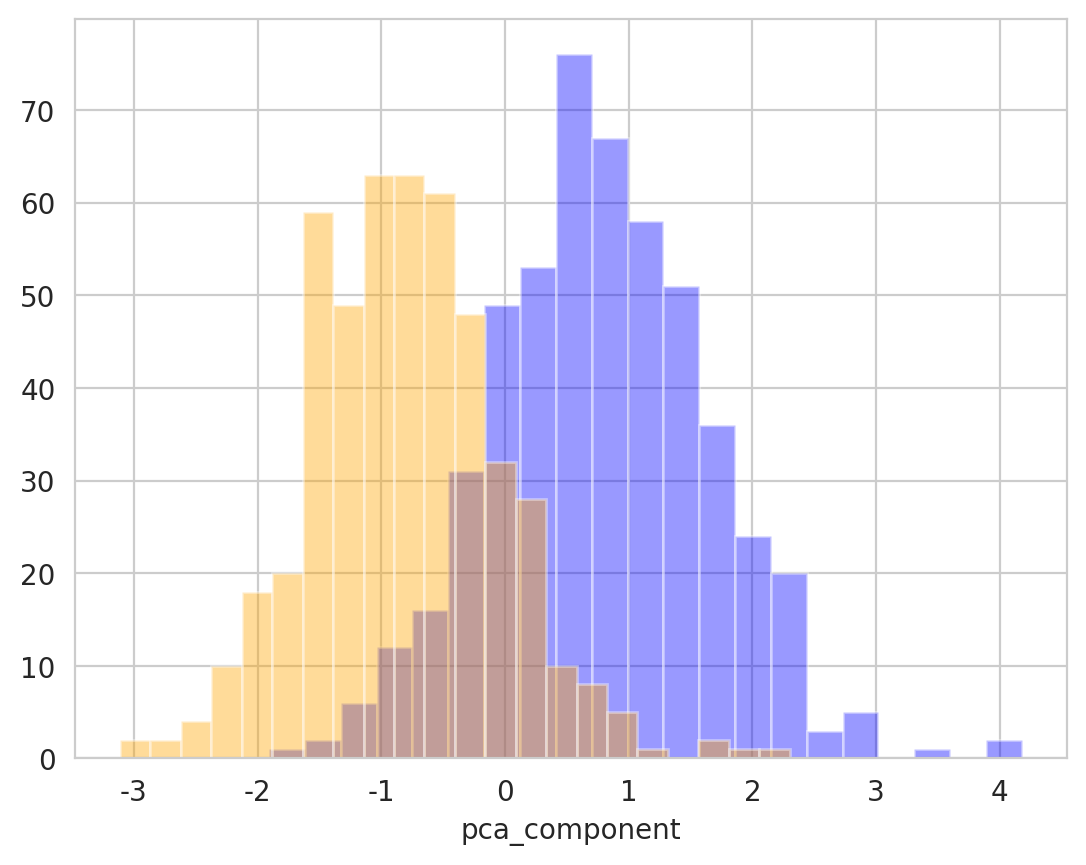

In [ ]:
df_pca_component = pd.DataFrame(df_pca, columns=['pca_component'])  # 주성분 분석 결과를 데이터프레임으로 변환하고 'pca_component'라는 열 이름으로 저장
df_pca_component['target'] = df.sex  # 'target' 열에 성별 데이터를 추가

# 남성과 여성 데이터의 주성분 분포를 시각화합니다.
sns.distplot(df_pca_component.loc[df_pca_component['target'] == 1, 'pca_component'],
             hist=True,  # 히스토그램을 표시
             color="blue",  # 히스토그램 색상을 파란색으로 지정
             kde=False,  # 커널 밀도 추정 그래프를 비활성화
             label='man')  # 그래프에 레이블 'man'을 추가

sns.distplot(df_pca_component.loc[df_pca_component['target'] == 2, 'pca_component'],
             hist=True,  # 히스토그램을 표시
             color="orange",  # 히스토그램 색상을 오렌지색으로 지정
             kde=False,  # 커널 밀도 추정 그래프를 비활성화
             label='woman')  # 그래프에 레이블 'woman'을 추가


<ipython-input-24-69030e7acdd4>:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_pca_component.loc[df_pca_component['target'] == 1, 'pca_component'], hist=True, kde=False, color="blue", label = 'man', ax=axs[0])
<ipython-input-24-69030e7acdd4>:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplo

<Axes: xlabel='lda_component'>

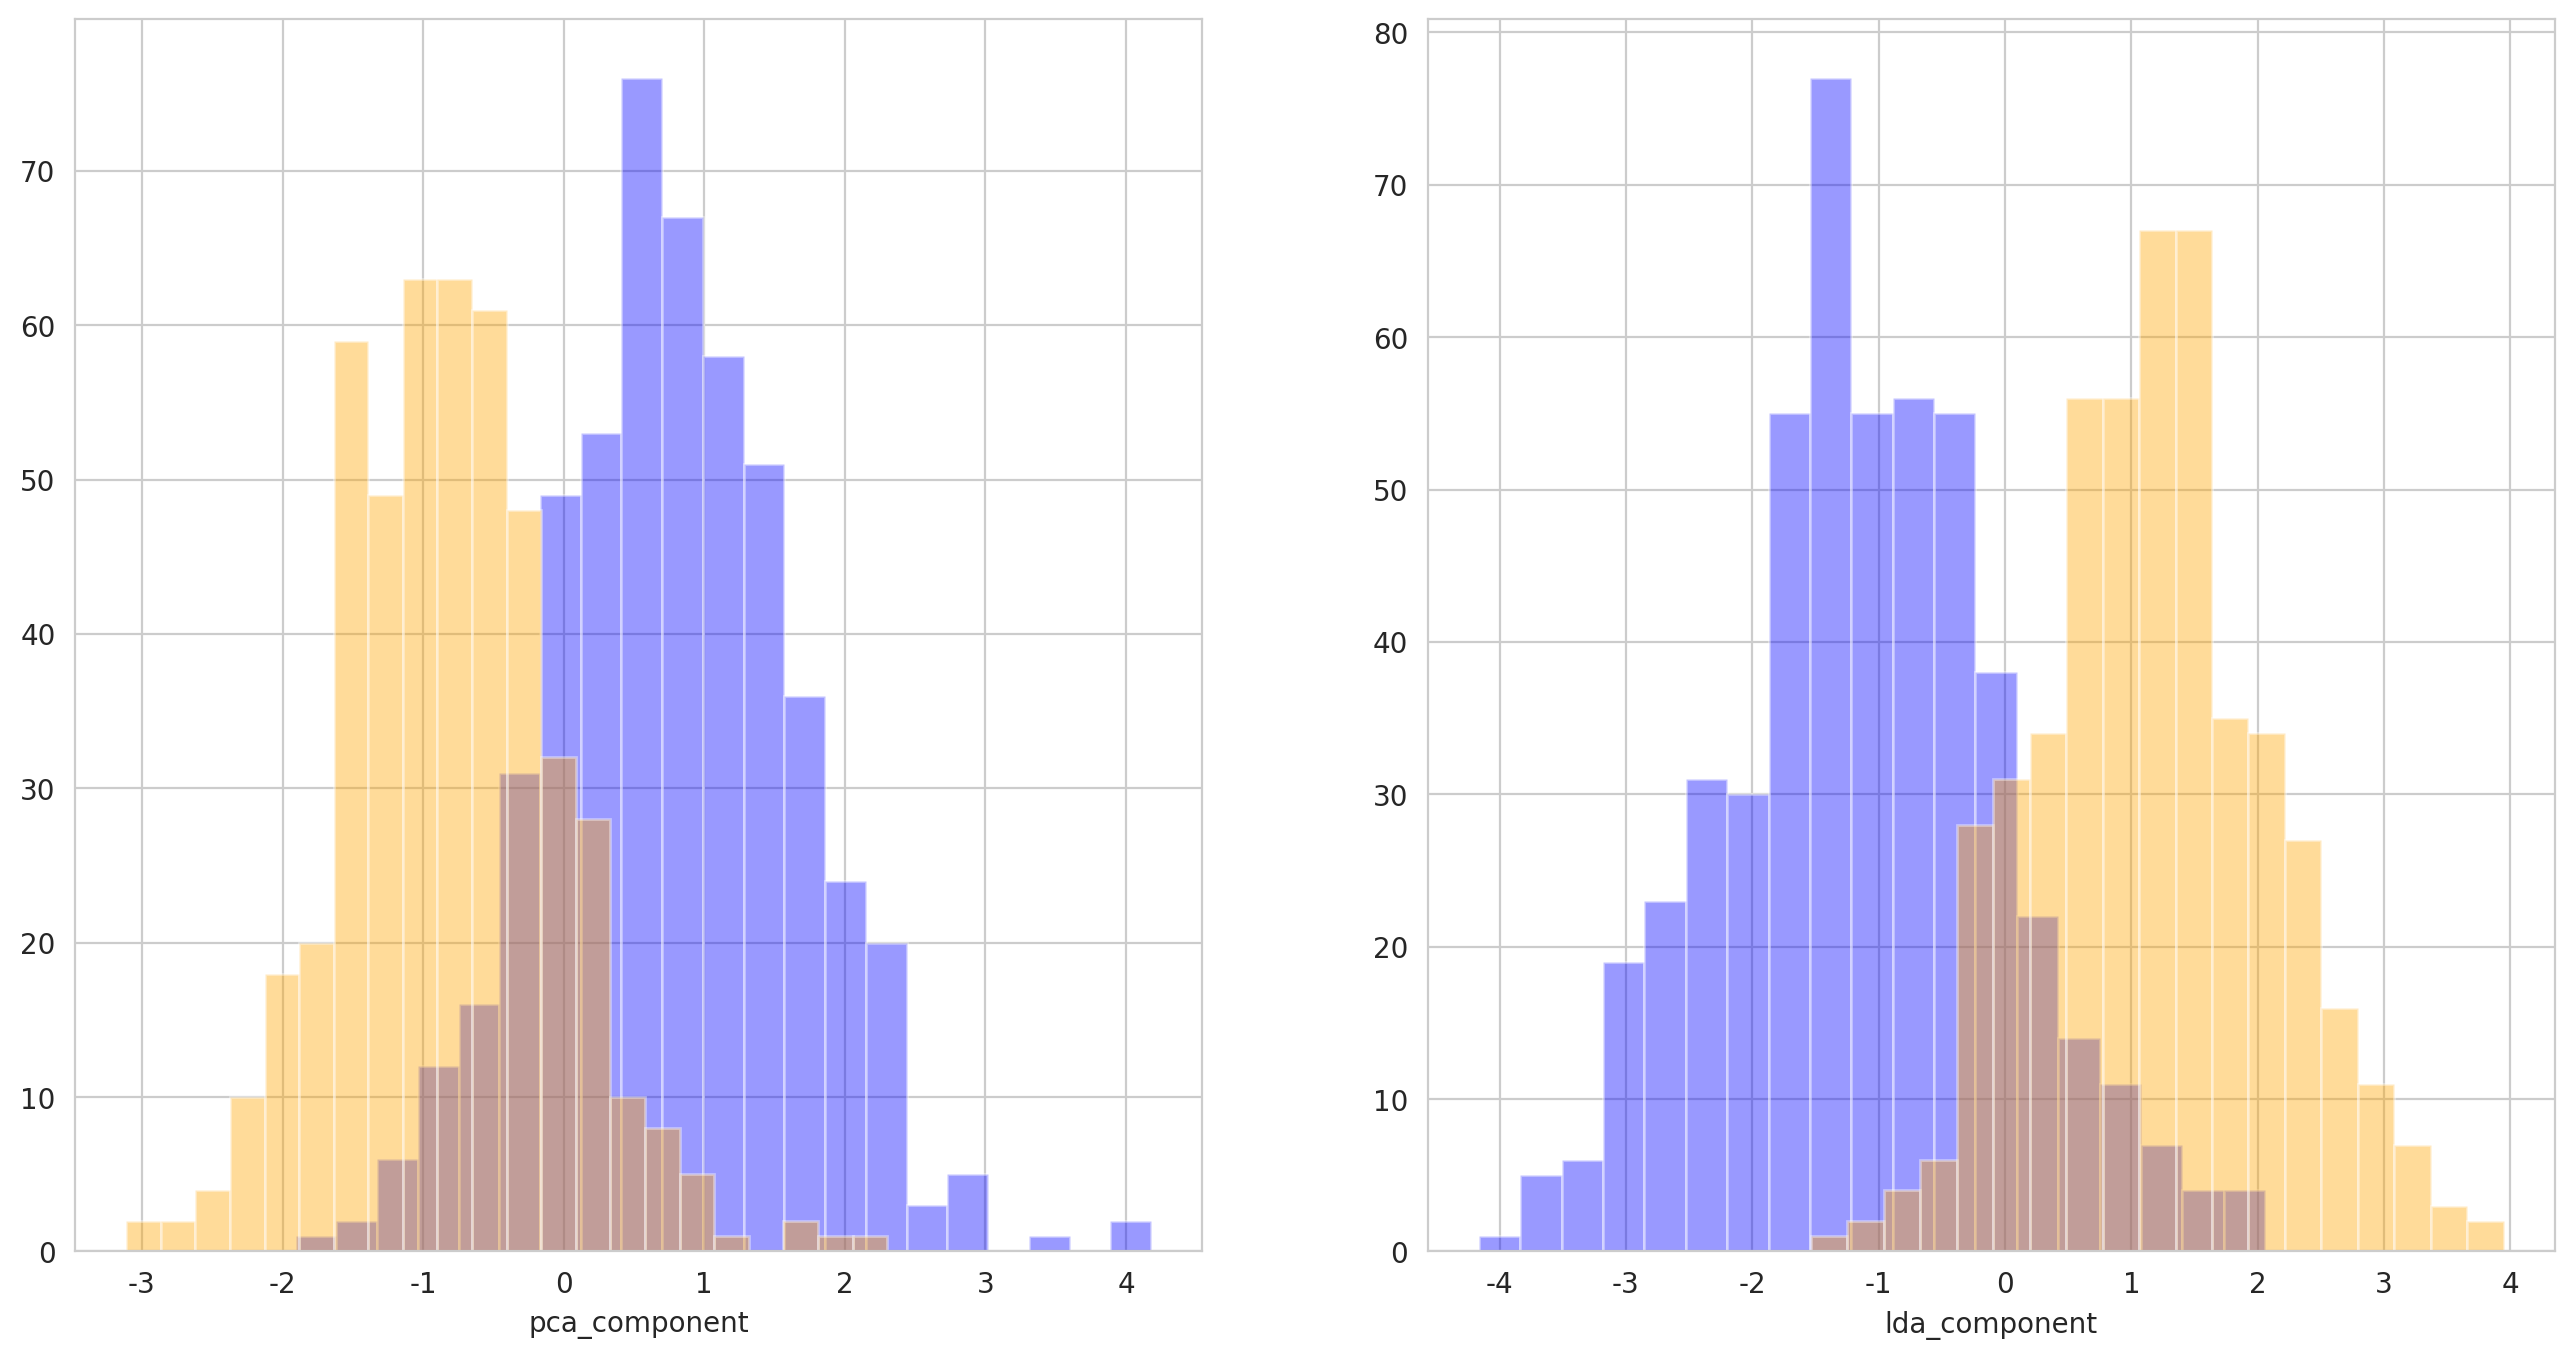

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components=1)  # LDA 객체를 생성하고, 주성분 개수를 1로 설정
lda.fit(df_scaled, df.sex)  # LDA를 표준화된 데이터와 성별 데이터에 fitting
df_lda = lda.transform(df_scaled)  # LDA를 통해 데이터를 변환하여 df_lda에 저장
df_lda_component = pd.DataFrame(df_lda, columns=['lda_component'])  # LDA 결과를 데이터프레임으로 변환하고 'lda_component'라는 열 이름으로 저장
df_lda_component['target'] = df.sex  # 'target' 열에 성별 데이터를 추가

fig, axs = plt.subplots(figsize=(16, 8), ncols=2, nrows=1)  # 2개의 서브플롯을 가지는 그래프 생성

# 첫 번째 서브플롯: PCA 결과를 시각화
sns.distplot(df_pca_component.loc[df_pca_component['target'] == 1, 'pca_component'], hist=True, kde=False, color="blue", label='man', ax=axs[0])
sns.distplot(df_pca_component.loc[df_pca_component['target'] == 2, 'pca_component'], hist=True, kde=False, color="orange", label='woman', ax=axs[0])

# 두 번째 서브플롯: LDA 결과를 시각화
sns.distplot(df_lda_component.loc[df_lda_component['target'] == 1, 'lda_component'], hist=True, kde=False, color="blue", label='man', ax=axs[1])
sns.distplot(df_lda_component.loc[df_lda_component['target'] == 2, 'lda_component'], hist=True, kde=False, color="orange", label='woman', ax=axs[1])
